# Data Preprocessing and Exploration


## Generate Sample Data

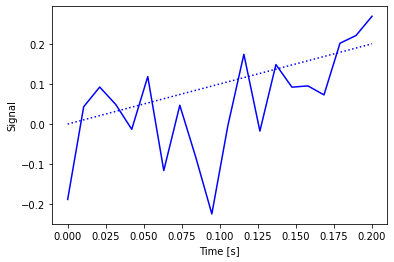

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define ramp signal with noise
sample_frequency = 100   # Hz
signal_timewindow = 0.2  # seconds
ramp_slope = 1
noise_amplitude = 0.1

# Generate Signal Data
n = round(signal_timewindow*sample_frequency)
t = np.linspace(0, signal_timewindow, n)
x = ramp_slope * t
x_noise = ramp_slope * t + noise_amplitude*(np.random.randn(n))

# Plot
plt.ylabel("Signal")
plt.xlabel("Time [s]")
plt.plot(t, x, 'b:')
plt.plot(t, x_noise, 'b')
plt.show()

xn = x_noise

## Apply Moving Average Filter

**plot signal**

In [ ]:
t

array([0.        , 0.01052632, 0.02105263, 0.03157895, 0.04210526,
       0.05263158, 0.06315789, 0.07368421, 0.08421053, 0.09473684,
       0.10526316, 0.11578947, 0.12631579, 0.13684211, 0.14736842,
       0.15789474, 0.16842105, 0.17894737, 0.18947368, 0.2       ])

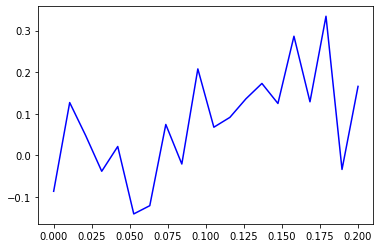

In [ ]:
plt.plot(t, xn, 'b')
plt.show()

**compute and plot moving average filters**

In [ ]:
# define moving average filters
h3 = [1/3]*3
h5 = [1/5]*5
print(h3)
print(h5)

[0.3333333333333333, 0.3333333333333333, 0.3333333333333333]
[0.2, 0.2, 0.2, 0.2, 0.2]


In [ ]:
# define filtering by convolutiong
x_filt3 = np.convolve(xn, h3)
x_filt5 = np.convolve(xn, h5)

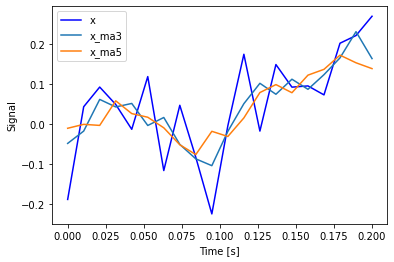

In [ ]:
# Plot
plt.ylabel("Signal")
plt.xlabel("Time [s]")
plt.plot(t, xn, 'b')
plt.plot(t, x_filt3[1:-1])
plt.plot(t, x_filt5[2:-2])
plt.legend(['x', 'x_ma3', 'x_ma5'])
plt.show()



## Linear Interpolation

**Define Signal with low sample frequency**

In [ ]:
x

array([ 0.00000000e+00,  6.42787610e-01,  9.84807753e-01,  8.66025404e-01,
        3.42020143e-01, -3.42020143e-01, -8.66025404e-01, -9.84807753e-01,
       -6.42787610e-01, -2.44929360e-16])

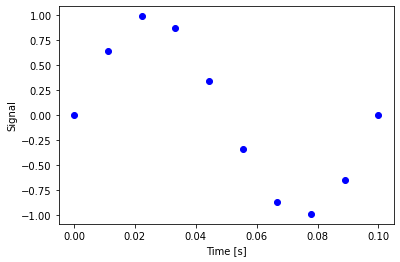

In [ ]:
# Define ramp signal with noise
sample_frequency = 100   # Hz
signal_timewindow = 0.1  # seconds
signal_frequency = 10    # Hz

# Generate Signal Data (sine)
t = np.linspace(0, signal_timewindow, round(signal_timewindow*sample_frequency))
x = np.sin(signal_frequency*2*np.pi*t)

# Plot
plt.ylabel("Signal")
plt.xlabel("Time [s]")
plt.plot(t, x, 'bo')
plt.show()

**upsample to higher frequency**

In [ ]:
print(x)
print(x_interp)

[ 0.00000000e+00  6.42787610e-01  9.84807753e-01  8.66025404e-01
  3.42020143e-01 -3.42020143e-01 -8.66025404e-01 -9.84807753e-01
 -6.42787610e-01 -2.44929360e-16]
[ 0.00000000e+00  1.18063030e-01  2.36126061e-01  3.54189091e-01
  4.72252121e-01  5.90315152e-01  6.77687624e-01  7.40507651e-01
  8.03327677e-01  8.66147703e-01  9.28967730e-01  9.82383623e-01
  9.60566457e-01  9.38749291e-01  9.16932125e-01  8.95114959e-01
  8.73297793e-01  8.01861494e-01  7.05615630e-01  6.09369766e-01
  5.13123902e-01  4.16878038e-01  3.14100132e-01  1.88460079e-01
  6.28200263e-02 -6.28200263e-02 -1.88460079e-01 -3.14100132e-01
 -4.16878038e-01 -5.13123902e-01 -6.09369766e-01 -7.05615630e-01
 -8.01861494e-01 -8.73297793e-01 -8.95114959e-01 -9.16932125e-01
 -9.38749291e-01 -9.60566457e-01 -9.82383623e-01 -9.28967730e-01
 -8.66147703e-01 -8.03327677e-01 -7.40507651e-01 -6.77687624e-01
 -5.90315152e-01 -4.72252121e-01 -3.54189091e-01 -2.36126061e-01
 -1.18063030e-01 -2.44929360e-16]


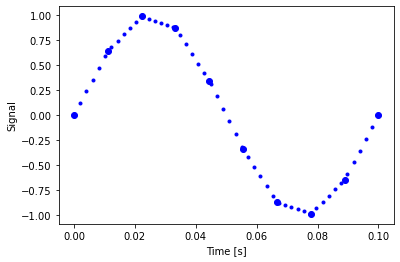

In [ ]:
interp_frequency = 500   # Hz

# Generate Interpolated Data
t_interp = np.linspace(0, signal_timewindow, round(signal_timewindow*interp_frequency))
x_interp = np.interp(t_interp, t, x)

# Plot
plt.ylabel("Signal")
plt.xlabel("Time [s]")
plt.plot(t, x, 'bo')
plt.plot(t_interp, x_interp, 'b.')
plt.show()


## Data Exploration

**visualize data in Feature space**

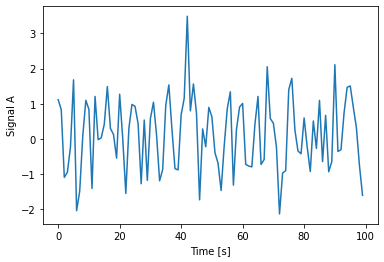

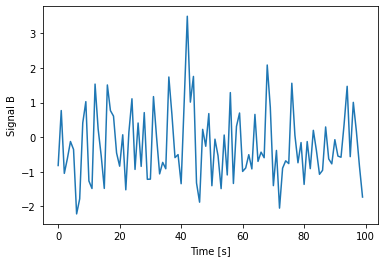

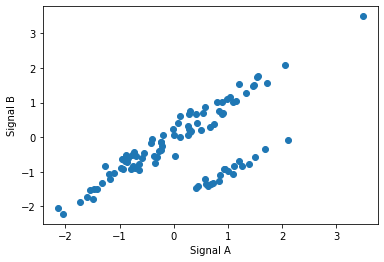

In [ ]:
n = 100
x = np.random.randn(n)
y = x+0.2*np.random.randn(n)
x[::5] = 1  + 0.5*x[::5]
y[::5] = -1 + 0.5*y[::5]

plt.ylabel("Signal A")
plt.xlabel("Time [s]")
plt.plot(x)
plt.show()

plt.ylabel("Signal B")
plt.xlabel("Time [s]")
plt.plot(y)
plt.show()

plt.ylabel("Signal B")
plt.xlabel("Signal A")
plt.plot(x,y, 'o')
plt.show()



In [ ]:
# statistics for Signal X
print('Maximum Value X:')
print(max(x))
print('Minimum Value X:')
print(min(x))

print('\nMaximum Value Y:')
print(max(y))
print('Minimum Value Y:')
print(min(y))


Maximum Value X:
3.487947438904081
Minimum Value X:
-2.1327881667916064

Maximum Value Y:
3.493772413832914
Minimum Value Y:
-2.2204941189869167


**k-Means clustering**

In [ ]:
from sklearn.cluster import KMeans

## create multidimensional feature space
XY = np.array([x, y]).transpose()
XY

array([[ 1.11556377, -0.82101543],
       [ 0.83457156,  0.76783243],
       [-1.09265516, -1.04841521],
       [-0.94683625, -0.61865174],
       [-0.23039569, -0.12725333],
       [ 1.6800467 , -0.35553514],
       [-2.04094532, -2.22049412],
       [-1.49077052, -1.78617374],
       [ 0.08394943,  0.41146392],
       [ 1.09742617,  1.02481823],
       [ 0.83887279, -1.26850951],
       [-1.40909603, -1.48603622],
       [ 1.20795432,  1.53237974],
       [-0.0212224 ,  0.23582925],
       [ 0.02934144, -0.54228099],
       [ 0.41649739, -1.48304899],
       [ 1.48804618,  1.50747993],
       [ 0.29799263,  0.76575746],
       [ 0.12430373,  0.60710411],
       [-0.54636059, -0.45930827],
       [ 1.26982647, -0.84094289],
       [ 0.01269283,  0.06721785],
       [-1.55021817, -1.52366899],
       [ 0.29642114,  0.13966094],
       [ 0.98079164,  1.10782352],
       [ 0.92736621, -0.93389671],
       [ 0.43193645,  0.40745114],
       [-1.27491034, -0.84619377],
       [ 0.53568224,

(-2.4138249470763906,
 3.7689842191888654,
 -2.506207445627908,
 3.7794857404739055)

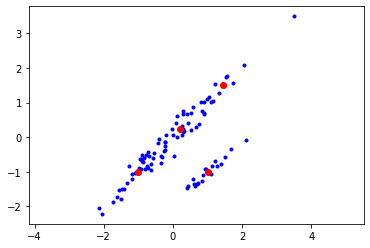

In [ ]:
## perform clustering
kmeans = KMeans(n_clusters=4, random_state=0).fit(XY)

## visualize result
plt.plot(XY[:,0], XY[:,1], 'b.')
plt.plot(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 'ro')
plt.axis('equal')


**Principal Component Analysis**

[0.85057644 0.14942356]


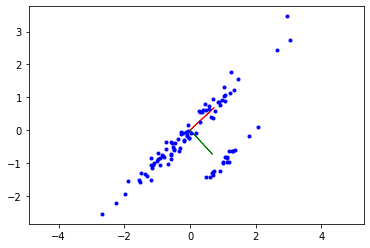

In [ ]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=2).fit(XY)

## visualize result
plt.plot(XY[:,0], XY[:,1], 'b.')
plt.arrow(0,0, pca.components_[0,0], pca.components_[0,1], color='r')
plt.arrow(0,0, pca.components_[1,0], pca.components_[1,1], color='g')
plt.axis('equal')

print(pca.explained_variance_ratio_)
